In [237]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import hashlib

import json

#import marvel api keys
from api_keys import marvelpub_api_key
from api_keys import marvelpri_key

In [238]:

#Constructing the Hash
m = hashlib.md5()   #I'm assigning the method to the variable m.  Marvel 
    #requires md5 hashing, but I could also use SHA256 or others for APIS other 
    #than Marvel's 

ts = str(time.time())   #This creates the time stamp as a string
ts_byte = bytes(ts, 'utf-8')  #This converts the timestamp into a byte 
m.update(ts_byte)  # I add the timestamp (in byte format) to the hash


private_key_byte = bytes(marvelpri_key, 'utf-8')
public_key_byte = bytes(marvelpub_api_key, 'utf-8')

m.update(private_key_byte) # I add api keys to the hash
m.update(public_key_byte)

hasht = m.hexdigest() # creating hash with ts, api keys (both)

#constructing the query
base_url = "https://gateway.marvel.com"  
api_key = marvelpub_api_key 
query_characters = "/v1/public/characters" +"?" 
query_comics = "/v1/public/comics" +"?"
query_creators = "/v1/public/creators" +"?"
query_events = "/v1/public/events" +"?"

#Building the actual query from the information above
character_url = base_url + query_characters +"ts=" + ts+ "&apikey=" + api_key + "&hash=" +hasht
print(character_url)

#comics 
comics_url = base_url + query_comics +"ts=" + ts+ "&apikey=" + api_key + "&hash=" +hasht
print(comics_url)

# creator
creators_url = base_url + query_creators +"ts=" + ts+ "&apikey=" + api_key + "&hash=" +hasht
print(creators_url)

# events
events_url = base_url + query_events +"ts=" + ts+ "&apikey=" + api_key + "&hash=" +hasht
print(events_url)


#Making the API request and receiving info back as a json
characters_response = requests.get(character_url)
print(characters_response)


https://gateway.marvel.com/v1/public/characters?ts=1695258997.6594958&apikey=fb40911e1ded92f137e9397e0925a78e&hash=79de563771316b737de7109c0995fec5
https://gateway.marvel.com/v1/public/comics?ts=1695258997.6594958&apikey=fb40911e1ded92f137e9397e0925a78e&hash=79de563771316b737de7109c0995fec5
https://gateway.marvel.com/v1/public/creators?ts=1695258997.6594958&apikey=fb40911e1ded92f137e9397e0925a78e&hash=79de563771316b737de7109c0995fec5
https://gateway.marvel.com/v1/public/events?ts=1695258997.6594958&apikey=fb40911e1ded92f137e9397e0925a78e&hash=79de563771316b737de7109c0995fec5
<Response [200]>


In [239]:
def get_creator_df(offset='1'):
    creators_url = base_url + query_creators +"ts=" + ts+ "&apikey=" + api_key + "&hash=" +hasht+"&limit=100&offset="+offset
    creator_response = requests.get(creators_url)
    creators_data = json.loads(creator_response.text)
    creators_df = pd.DataFrame(creators_data['data']['results'])
    return creators_df
    
    
    

In [240]:
creator_df1 = get_creator_df('1')
creator_df2 = get_creator_df('2')
creator_df3 = get_creator_df('3')
creator_df4 = get_creator_df('4')
creator_df5 = get_creator_df('5')


In [241]:
creator_df = pd.concat([creator_df1,creator_df2,creator_df3,creator_df4,creator_df5]).reset_index()

creator_df.shape

(500, 15)

In [242]:
creators_df['comics_available'] = pd.DataFrame.from_records(creators_df['comics'])['available']

creators_df['series_available'] = pd.DataFrame.from_records(creators_df['series'])['available']

creators_df['stories_available'] = pd.DataFrame.from_records(creators_df['stories'])['available']

creators_df['events_available'] = pd.DataFrame.from_records(creators_df['events'])['available']
creators_df.head()

,id,firstName,middleName,lastName,suffix,fullName,modified,thumbnail,resourceURI,comics,series,stories,events,urls,comics_available,series_available,stories_available,events_available
0,13970,#O,,,,#O,2019-12-11T17:10:07-0500,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/creators/1...,"{'available': 4, 'collectionURI': 'http://gate...","{'available': 4, 'collectionURI': 'http://gate...","{'available': 3, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/...",4,4,3,0
1,13971,#X,,,,#X,2019-12-11T17:21:29-0500,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/creators/1...,"{'available': 4, 'collectionURI': 'http://gate...","{'available': 4, 'collectionURI': 'http://gate...","{'available': 4, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/...",4,4,4,0
8,12958,Balak,,,,Balak,2016-12-09T17:26:17-0500,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/creators/1...,"{'available': 1, 'collectionURI': 'http://gate...","{'available': 1, 'collectionURI': 'http://gate...","{'available': 1, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/...",1,1,1,0
75,2330,Malibu,,,,Malibu,2018-07-23T11:37:56-0400,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/creators/2330,"{'available': 20, 'collectionURI': 'http://gat...","{'available': 4, 'collectionURI': 'http://gate...","{'available': 23, 'collectionURI': 'http://gat...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/...",0,0,0,0
71,3187,Lombardia,,,,Lombardia,2007-01-02T00:00:00-0500,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/creators/3187,"{'available': 0, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/...",1,1,6,0


In [243]:
creators_df.index

Int64Index([ 0,  1,  8, 75, 71, 72, 68, 74, 70, 67, 61, 62, 77, 96, 56, 78, 73,
            57, 69, 64, 92, 54, 94,  2,  6, 95, 79, 58,  7, 55,  3, 76, 21, 66,
            27, 10, 28,  5, 85,  4, 80, 24, 84, 22, 81, 86, 53, 91, 25, 63, 65,
            60, 59, 97, 98, 93, 83, 82, 49, 19, 89, 41, 37, 23, 16, 99, 18, 15,
            34, 39, 43, 32, 31, 26, 44, 35, 50, 29, 12, 51, 17, 47,  9, 90, 87,
            88, 46, 20, 48, 13, 14, 38, 40, 52, 36, 11, 42, 45, 33, 30],
           dtype='int64')

In [244]:
creators_df['firstName'].values

array(['#O', '#X', 'Balak', 'Malibu', 'Lombardia', 'Lopez', 'Laz',
       'Malibu', 'Lazarus', 'KylLs', 'Johnsons', 'Jr', 'Matthew',
       'Norton', 'Jc', 'McGray', 'Low', 'Jeffery', 'Lazarelli', 'Keng',
       'Nf', 'Hoon', 'Nichols', 'A.R.K.', 'Avon', 'Njq', 'Method Man',
       'Jg', 'B.K.', 'Impacto', 'All Thumbs Creative', 'Mas', 'Caesar',
       'KNIGHT AGENCY, INC.', 'ChrisCross', 'Batt', 'Co.', 'Arno', 'More',
       'ALSJOERDSMA', 'Mettier', 'Chad Bowers & Chris Sims', 'More',
       'Cafu', 'MITRIC', 'Morgan', 'Homs', 'N/A', 'Charlamagne tha God',
       'Kano', 'Kf', 'Jock', 'Jl', 'Oakley', 'Olivetti', 'Ni', 'Moede',
       'Moebius', 'Henkel', 'Brown', 'N. Y. tribe', 'Fuller', 'Dub',
       'Cameron', 'BIT', 'OlyOptics.Com', 'Blond', 'Bernet',
       'Diverse Hands', 'Flaviano', 'GCW', 'CRISSE', 'Condoy', 'Chiya',
       'Geoffo', 'Dr. Martin', 'Hicks', 'Colorgraphix', 'Beckett',
       'HiFi Colour', 'Blank', 'Guru-eFX, Lee Duhig', 'Balcells',
       'N.j.q.', 'Mundelo', 

In [245]:
creators_df = creators_df.sort_values(by=['comics_available'],ascending=False)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


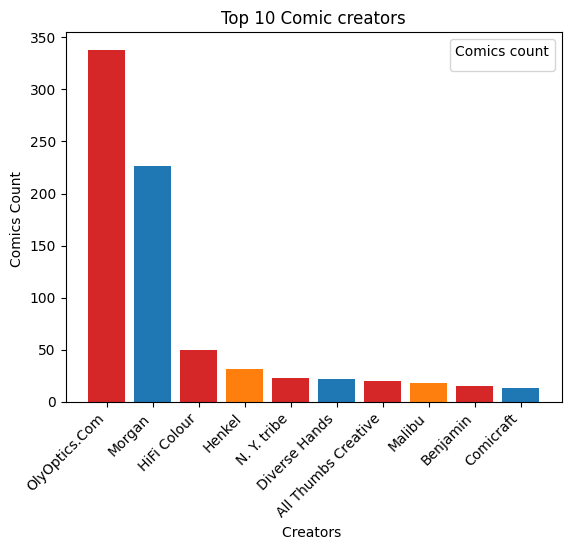

In [246]:


fig, ax = plt.subplots()

x_labels = creators_df['fullName'].values[:10]
comics_available_count = creators_df['comics_available'].values[:10]

ax.bar(x_labels, comics_available_count, color=bar_colors)

ax.set_xlabel('Creators ')
ax.set_ylabel('Comics Count ')
ax.set_title('Top 10 Comic creators')
ax.legend(title='Comics count')
plt.xticks(rotation=45, ha='right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


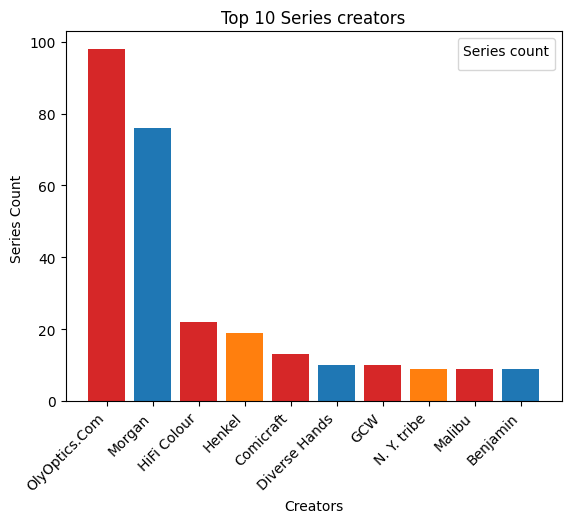

In [247]:
creators_df = creators_df.sort_values(by=['series_available'],ascending=False)
fig, ax = plt.subplots()

x_labels = creators_df['fullName'].values[:10]
series_available_count = creators_df['series_available'].values[:10]

ax.bar(x_labels, series_available_count, color=bar_colors)

ax.set_xlabel('Creators')
ax.set_ylabel('Series Count ')
ax.set_title('Top 10 Series creators')
ax.legend(title='Series count')
plt.xticks(rotation=45, ha='right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


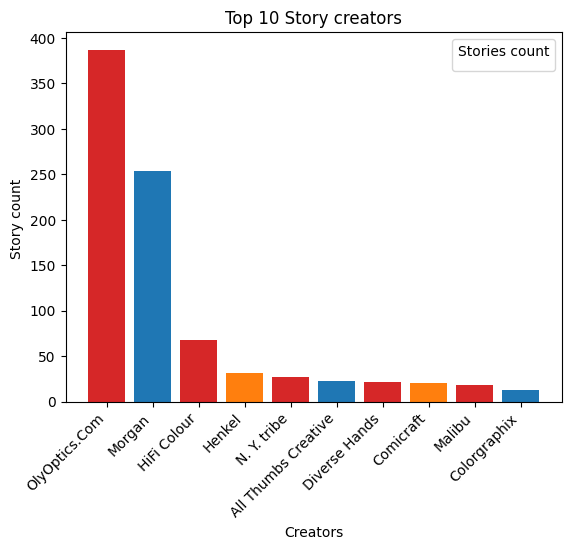

In [248]:
creators_df = creators_df.sort_values(by=['stories_available'],ascending=False)
fig, ax = plt.subplots()

x_labels = creators_df['fullName'].values[:10]
stories_available_count = creators_df['stories_available'].values[:10]

ax.bar(x_labels, stories_available_count, color=bar_colors)

ax.set_xlabel('Creators')
ax.set_ylabel('Story count ')
ax.set_title('Top 10 Story creators')
ax.legend(title='Stories count')
plt.xticks(rotation=45, ha='right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


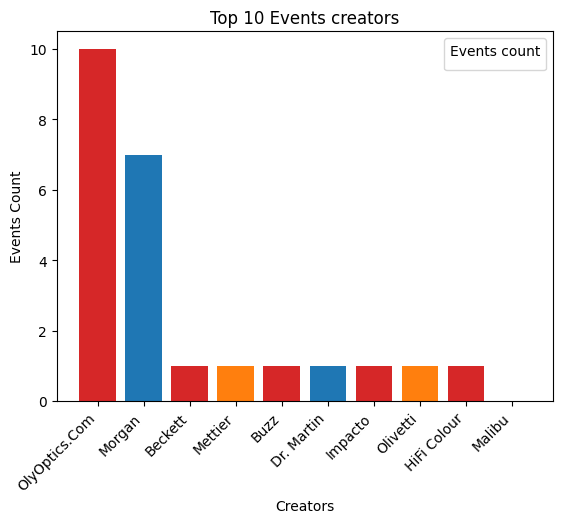

In [249]:
creators_df = creators_df.sort_values(by=['events_available'],ascending=False)
fig, ax = plt.subplots()

x_labels = creators_df['fullName'].values[:10]
events_available_count = creators_df['events_available'].values[:10]

ax.bar(x_labels, events_available_count, color=bar_colors)

ax.set_xlabel('Creators')
ax.set_ylabel('Events Count')
ax.set_title('Top 10 Events creators')
ax.legend(title='Events count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [250]:
def get_character_df(offset='1'):
    character_url = base_url + query_characters +"ts=" + ts+ "&apikey=" + api_key + "&hash=" +hasht+"&limit=100&offset="+offset
    print(character_url)
    character_response = requests.get(character_url)
    character_data = json.loads(character_response.text)
    character_df = pd.DataFrame(character_data['data']['results'])
    return character_df
    

In [251]:
character_df1 = get_character_df('1')
character_df2 = get_character_df('2')
character_df3 = get_character_df('3')
character_df4 = get_character_df('4')
character_df5 = get_character_df('5')


https://gateway.marvel.com/v1/public/characters?ts=1695258997.6594958&apikey=fb40911e1ded92f137e9397e0925a78e&hash=79de563771316b737de7109c0995fec5&limit=100&offset=1
https://gateway.marvel.com/v1/public/characters?ts=1695258997.6594958&apikey=fb40911e1ded92f137e9397e0925a78e&hash=79de563771316b737de7109c0995fec5&limit=100&offset=2
https://gateway.marvel.com/v1/public/characters?ts=1695258997.6594958&apikey=fb40911e1ded92f137e9397e0925a78e&hash=79de563771316b737de7109c0995fec5&limit=100&offset=3
https://gateway.marvel.com/v1/public/characters?ts=1695258997.6594958&apikey=fb40911e1ded92f137e9397e0925a78e&hash=79de563771316b737de7109c0995fec5&limit=100&offset=4
https://gateway.marvel.com/v1/public/characters?ts=1695258997.6594958&apikey=fb40911e1ded92f137e9397e0925a78e&hash=79de563771316b737de7109c0995fec5&limit=100&offset=5


In [252]:
character_df5.shape

(100, 11)

In [253]:
character_df = pd.concat([character_df1,character_df2,character_df3,character_df4,character_df5]).reset_index()
character_df.shape

(500, 12)

In [254]:
character_df.head()

,index,id,name,description,modified,thumbnail,resourceURI,comics,series,stories,events,urls
0,0,1017100,A-Bomb (HAS),Rick Jones has been Hulk's best bud since day ...,2013-09-18T15:54:04-0400,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/characters...,"{'available': 4, 'collectionURI': 'http://gate...","{'available': 2, 'collectionURI': 'http://gate...","{'available': 7, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/..."
1,1,1009144,A.I.M.,AIM is a terrorist organization bent on destro...,2013-10-17T14:41:30-0400,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/characters...,"{'available': 53, 'collectionURI': 'http://gat...","{'available': 36, 'collectionURI': 'http://gat...","{'available': 57, 'collectionURI': 'http://gat...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/..."
2,2,1010699,Aaron Stack,,1969-12-31T19:00:00-0500,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/characters...,"{'available': 14, 'collectionURI': 'http://gat...","{'available': 3, 'collectionURI': 'http://gate...","{'available': 27, 'collectionURI': 'http://gat...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/..."
3,3,1009146,Abomination (Emil Blonsky),"Formerly known as Emil Blonsky, a spy of Sovie...",2012-03-20T12:32:12-0400,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/characters...,"{'available': 55, 'collectionURI': 'http://gat...","{'available': 27, 'collectionURI': 'http://gat...","{'available': 65, 'collectionURI': 'http://gat...","{'available': 1, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/..."
4,4,1016823,Abomination (Ultimate),,2012-07-10T19:11:52-0400,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/characters...,"{'available': 2, 'collectionURI': 'http://gate...","{'available': 2, 'collectionURI': 'http://gate...","{'available': 3, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/..."


In [255]:
character_df['comics'][0]

{'available': 4,
 'collectionURI': 'http://gateway.marvel.com/v1/public/characters/1017100/comics',
 'items': [{'resourceURI': 'http://gateway.marvel.com/v1/public/comics/47176',
   'name': 'FREE COMIC BOOK DAY 2013 1 (2013) #1'},
  {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/40632',
   'name': 'Hulk (2008) #53'},
  {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/40630',
   'name': 'Hulk (2008) #54'},
  {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/40628',
   'name': 'Hulk (2008) #55'}],
 'returned': 4}

In [256]:
character_df['comics_available'] = pd.DataFrame.from_records(character_df['comics'])['available']

character_df['series_available'] = pd.DataFrame.from_records(character_df['series'])['available']

character_df['stories_available'] = pd.DataFrame.from_records(character_df['stories'])['available']

character_df['events_available'] = pd.DataFrame.from_records(character_df['events'])['available']
character_df.head()

,index,id,name,description,modified,thumbnail,resourceURI,comics,series,stories,events,urls,comics_available,series_available,stories_available,events_available
0,0,1017100,A-Bomb (HAS),Rick Jones has been Hulk's best bud since day ...,2013-09-18T15:54:04-0400,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/characters...,"{'available': 4, 'collectionURI': 'http://gate...","{'available': 2, 'collectionURI': 'http://gate...","{'available': 7, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/...",4,2,7,0
1,1,1009144,A.I.M.,AIM is a terrorist organization bent on destro...,2013-10-17T14:41:30-0400,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/characters...,"{'available': 53, 'collectionURI': 'http://gat...","{'available': 36, 'collectionURI': 'http://gat...","{'available': 57, 'collectionURI': 'http://gat...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/...",53,36,57,0
2,2,1010699,Aaron Stack,,1969-12-31T19:00:00-0500,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/characters...,"{'available': 14, 'collectionURI': 'http://gat...","{'available': 3, 'collectionURI': 'http://gate...","{'available': 27, 'collectionURI': 'http://gat...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/...",14,3,27,0
3,3,1009146,Abomination (Emil Blonsky),"Formerly known as Emil Blonsky, a spy of Sovie...",2012-03-20T12:32:12-0400,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/characters...,"{'available': 55, 'collectionURI': 'http://gat...","{'available': 27, 'collectionURI': 'http://gat...","{'available': 65, 'collectionURI': 'http://gat...","{'available': 1, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/...",55,27,65,1
4,4,1016823,Abomination (Ultimate),,2012-07-10T19:11:52-0400,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/characters...,"{'available': 2, 'collectionURI': 'http://gate...","{'available': 2, 'collectionURI': 'http://gate...","{'available': 3, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/...",2,2,3,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


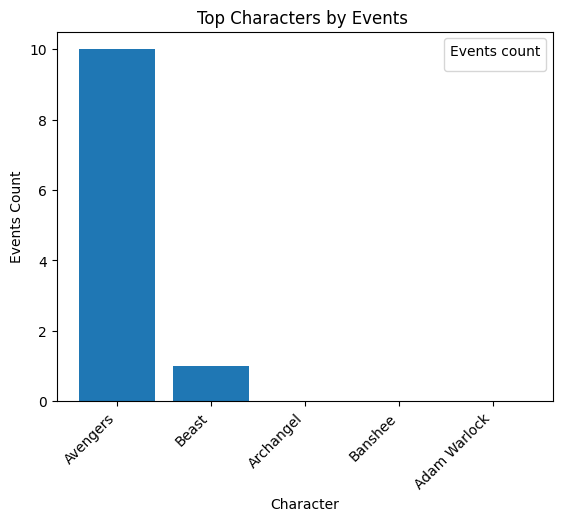

In [257]:
character_df = character_df.sort_values(by=['events_available'],ascending=False)
fig, ax = plt.subplots()

x_labels = character_df['name'].values[:25]
events_available_count = creators_df['events_available'].values[:25]


ax.bar(x_labels, events_available_count)

ax.set_xlabel('Character')
ax.set_ylabel('Events Count')
ax.set_title('Top Characters by Events ')
ax.legend(title='Events count')
plt.xticks(rotation=45, ha='right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


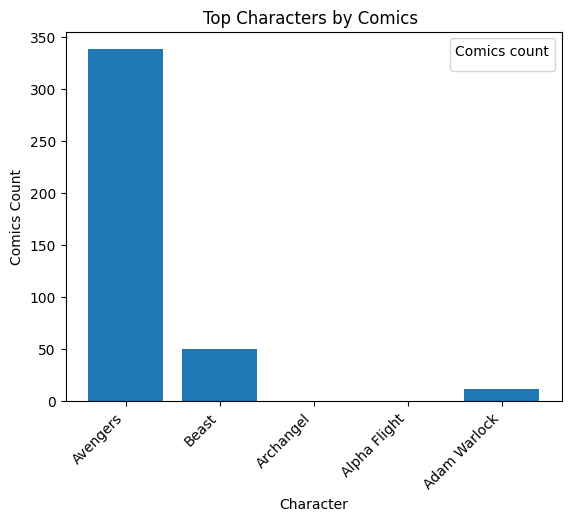

In [258]:
character_df = character_df.sort_values(by=['comics_available'],ascending=False)
fig, ax = plt.subplots()

x_labels = character_df['name'].values[:25]
comics_available_count = creators_df['comics_available'].values[:25]


ax.bar(x_labels, comics_available_count)

ax.set_xlabel('Character')
ax.set_ylabel('Comics Count')
ax.set_title('Top Characters by Comics ')
ax.legend(title='Comics count')
plt.xticks(rotation=45, ha='right')
plt.show()